<a href="https://colab.research.google.com/github/MikiPenguin/test/blob/main/notebooks/es0/Lesson__0_pytorch_soda_can_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Optimization of Surface-to-Volume Ratio in a Cylinder
[SLIDES](https://docs.google.com/presentation/d/1k5Ad5V_8sgvdTDyRzwxOhGObPCrzT_oXOlaZ8PjMGes/edit?usp=sharing)

## Problem Statement

Given a cylindrical can of fixed volume $(V_0)$, we want to determine the radius $(r)$ that minimizes the surface-to-volume ratio. The surface area is related to material cost, so minimizing this ratio is important for cost efficiency.

## Define the Surface Area and Volume

- **Volume**:  
  $$ V = \pi r^2 h $$
- **Surface Area** (sum of lateral and two circular areas):  
  $$ S = 2\pi r h + 2\pi r^2 $$

We aim to minimize the ratio $(S/V)$:

$$ \frac{S}{V} = \frac{2\pi r h + 2\pi r^2}{\pi r^2 h} $$



$$= \frac{2(h+r)}{rh}$$

## T fixed volume $(V=33\ cl)$


$$
\frac{S}{V} = \frac{2}{r} + \frac{2\pi r^2}{V_0}
$$



##Find the Critical Points

To minimize $(S/V)$, we take the derivative with respect to $(r)$:

$$
\frac{d}{dr} \left( \frac{2}{r} + \frac{2\pi r^2}{V_0} \right) = -\frac{2}{r^2} + \frac{4\pi r}{V_0}
$$

Setting the derivative to zero:

$$
-\frac{2}{r^2} + \frac{4\pi r}{V_0} = 0
$$



$$
r = \left(\frac{V_0}{2\pi}\right)^{\frac{1}{3}}
$$




In [ ]:
# soda can problem
V0 = 330
SoverV0 = lambda r: (2/r + (2*np.pi * r **2) / V0)
R_opt = (V0/(2*np.pi))**(1/3)

In [ ]:
r = np.linspace(0.2,20,300)
y = SoverV0(r)

Text(0, 0.5, 'Surface Volume ratio (cm^-1)')

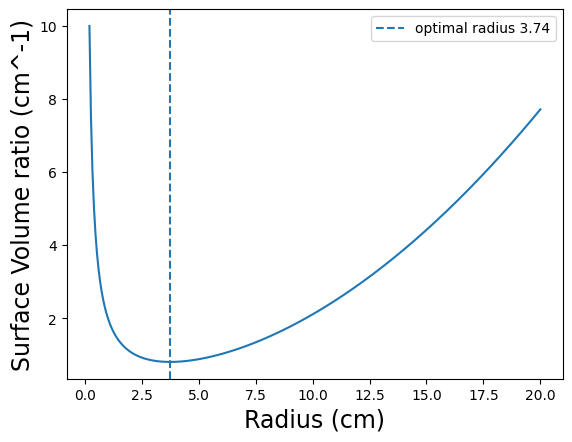

In [ ]:
plt.plot(r,y)
plt.axvline(R_opt,linestyle="--",label=f"optimal radius {np.round(R_opt,2)}")
plt.legend()
plt.xlabel("Radius (cm)" , fontsize =17)
plt.ylabel("Surface Volume ratio (cm^-1)", fontsize =17)

# Summary: How Gradient Descent Works

Gradient Descent is an optimization algorithm used to minimize a function by iteratively adjusting its parameters in the direction of the steepest descent, as defined by the negative gradient.

## Key Steps:
1. **Initialize Parameters**: Start with random values for the parameters \( \theta \).
2. **Compute the Gradient**: Calculate the derivative (gradient) of the function with respect to the parameters.
3. **Update the Parameters**: Move in the direction of the negative gradient using the update rule:

   $$
   \theta \leftarrow \theta - \eta \nabla f(\theta)
   $$

   where  $\eta$ (learning rate) controls the step size.
4. **Repeat**: Continue updating until convergence (when the gradient is close to zero or changes are minimal).

## What's about Machine Learning and Gradient Descent?

It is the same idea, but instead of minimizing any arbitrary function (like \( S/V \) in the soda can problem), we want to minimize the **expected value of the loss (or error) function** over the training data.

### Loss Function:

For a dataset with \( N \) samples, where each sample has a true target $ y_i$ and a predicted value $\tilde{y}_i(w) $, the total loss is computed as:

$$
L(w) = \frac{1}{N} \sum_{i=1}^{N} l_w(y_i, \tilde{y}_i)
$$

where:
- $ L(w)$ is the total loss function we aim to minimize.
- $ l_w(y_i, \tilde{y}_i) $ is the loss for each individual training sample, measuring the difference between the predicted and true values.
- $ w $ represents the model parameters (e.g., weights in a neural network).

### Optimization in Machine Learning:

We update the model parameters using **Gradient Descent**:

$$
w \leftarrow w - \eta \nabla L(w)
$$

## types of gradient descent (the element on which the sum is computed with)


- **Batch Gradient Descent**: Uses the entire dataset to compute the gradient.
- **Stochastic Gradient Descent (SGD)**: Updates parameters using a single random data point per iteration.
- **Mini-Batch Gradient Descent**: Uses a small batch of data to balance efficiency and stability.




In [ ]:


class SoverVoptimizer():
    def __init__(self, V0, learning_rate=0.1, epochs=400):
        self.V0 = V0  # Fixed volume
        self.learning_rate = learning_rate  # Step size

        self.epochs = epochs  # Maximum number of iterations
        self.r_history = []  # Store the radius at each step
        self.f_history = []

    def forward(self, r):
        """Function to optimize: S/V = 2/r + (2 * pi * r^2) / V0"""
        return 2 / r + (2 * np.pi * r ** 2) / self.V0

    def derivative(self, r):# like old timers, we need to compute the derivative by hand
        """Derivative of the objective function."""
        return -2 / r**2 + (4 * np.pi * r) / self.V0

    def do_a_step(self, r):
        """Perform a single step of gradient descent."""
        gradient = self.derivative(r)
        return r - self.learning_rate * gradient  # Update radius

    def optimize(self, r_init):#In machine learnig we call this part "train"
        """Run the gradient descent optimization."""
        r = r_init
        self.r_history.append(r)

        f = self.forward(r)
        self.f_history.append(f)


        for i in range(self.epochs):
            new_r = self.do_a_step(r)
            self.r_history.append(new_r)
            f = self.forward(new_r)
            self.f_history.append(f)
            r = new_r

        return r  # Return the optimized radius


V0 = 330  # Fixed volume
SodaCan = SoverVoptimizer(V0, learning_rate=0.2)
optimal_r = SodaCan.optimize(r_init=20)  # Start from an initial guess of r

print(f"Optimal radius: {optimal_r}")



Optimal radius: 3.763808225486353


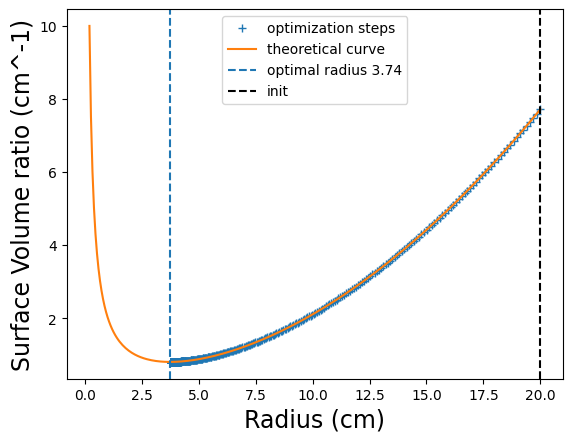

In [ ]:
plt.plot(SodaCan.r_history,SodaCan.f_history,"+",label= "optimization steps")
plt.plot(r,y,label= "theoretical curve")
plt.axvline(R_opt,linestyle="--",label=f"optimal radius {np.round(R_opt,2)}")
plt.xlabel("Radius (cm)" , fontsize =17)
plt.ylabel("Surface Volume ratio (cm^-1)", fontsize =17)
plt.axvline(20,linestyle="--",label="init",color="k")
plt.legend()

In [1]:
import torch
import torch.nn as nn

class SodaCan(nn.Module):
    def __init__(self, V0, lr=0.1):
        super(SodaCan, self).__init__()
        self.V0 = V0

        self.pi = torch.acos(torch.zeros(1) * 2)  # π
        self.R = torch.tensor(20.0, requires_grad=True)  # Raggio iniziale
        self.lr = torch.tensor(lr)  # Learning rate (costante)

    def forward(self):
        return 2 / self.R + (2 * self.pi * self.R**2) / self.V0

    def Do_a_step(self):
        gradSov = torch.autograd.grad(self.forward(), self.R, retain_graph=True)
        self.R.data -= self.lr * gradSov[0].data  # Aggiornamento senza scollegare il grafo

        return self.R.item(), gradSov[0].item(), self.forward().item()


In [2]:
V0 = 500  # Supponiamo che la lattina abbia un volume di 500 cm³
can = SodaCan(V0)


In [ ]:
for i in range(100):  # 100 iterazioni
    R_value, grad_value, loss_value = can.Do_a_step()
    print(f"Step {i+1}: R = {R_value:.4f}, Grad = {grad_value:.4f}, Loss = {loss_value:.4f}")


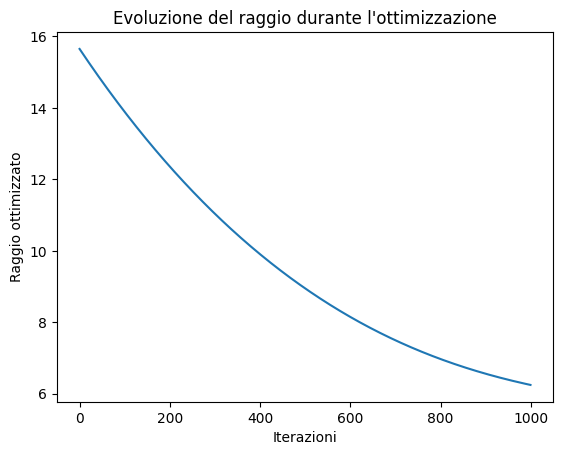

In [5]:
import matplotlib.pyplot as plt

R_values = []
for i in range(1000):
    R_value, _, _ = can.Do_a_step()
    R_values.append(R_value)

plt.plot(R_values)
plt.xlabel("Iterazioni")
plt.ylabel("Raggio ottimizzato")
plt.title("Evoluzione del raggio durante l'ottimizzazione")
plt.show()


#ora dovremmo fare la stessa cosa ma con la funzione "backward()"
#Perché usare backward() è meglio?
#✅ Più semplice e leggibile
#✅ Più efficiente (PyTorch calcola tutti i gradienti in una sola passata)
#✅ Facile da scalare a problemi più complessi (reti neurali, ottimizzazione avanzata, etc.)

In [8]:
import torch
import torch.nn as nn

class SodaCan(nn.Module):
    def __init__(self, V0, lr=0.1):
        super(SodaCan, self).__init__()
        self.V0 = V0

        self.pi = torch.acos(torch.zeros(1) * 2)  # π
        self.R = torch.tensor(20.0, requires_grad=True)  # Raggio iniziale
        self.lr = lr  # Learning rate

    def forward(self):
        return 2 / self.R + (2 * self.pi * self.R**2) / self.V0

    def Do_a_step(self):
        loss = self.forward()  # Calcola la funzione obiettivo
        loss.backward()  # Calcola il gradiente automaticamente

        with torch.no_grad():  # Disabilita il tracking dei gradienti per aggiornare R
            self.R -= self.lr * self.R.grad  # Aggiornamento del raggio
            self.R.grad.zero_()  # Reset del gradiente per la prossima iterazione

        return self.R.item(), loss.item()

In [9]:
# Test del codice
V0 = 500
can = SodaCan(V0)

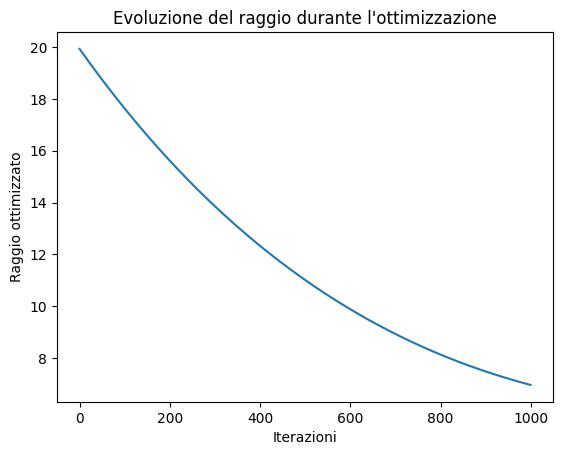

In [12]:
#for i in range(1000):
#    R_value, loss_value = can.Do_a_step()
#    if i % 100 == 0:
#        print(f"Iterazione {i}: R = {R_value:.4f}, Loss = {loss_value:.4f}")


#plottiamo qualcosa
import matplotlib.pyplot as plt

R_values = []
for i in range(1000):
    R_value, _ = can.Do_a_step()
    R_values.append(R_value)

plt.plot(R_values)
plt.xlabel("Iterazioni")
plt.ylabel("Raggio ottimizzato")
plt.title("Evoluzione del raggio durante l'ottimizzazione")
plt.show()

prova, pene